# matplotlib

* http://matplotlib.org/

In [221]:
# Jupyter Notebook 上で動かす場合にのみ必要
%matplotlib inline

## シンプルな使い方

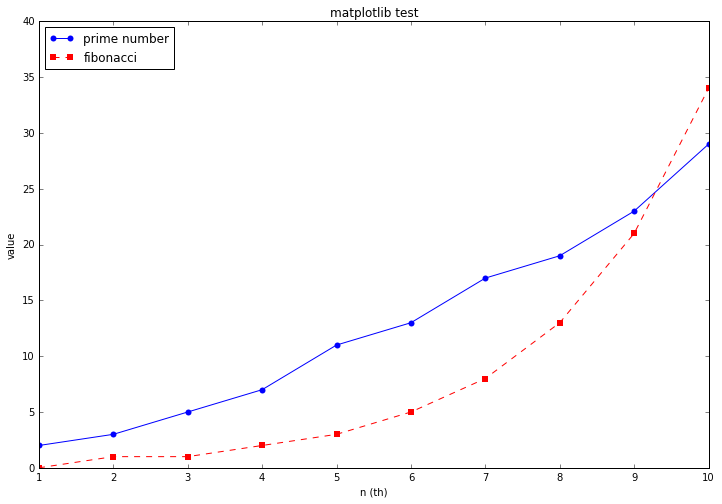

In [214]:
import matplotlib.pyplot as plt

xs  = [1, 2, 3, 4,  5,  6,  7,  8,  9, 10]
ys1 = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
ys2 = [0, 1, 1, 2, 3,  5,  8, 13, 21, 34]

plt.figure(figsize=(12, 8), dpi=96, facecolor='white')

plt.plot(xs, ys1, '-o', color='blue', mew=0, label='prime number')
plt.plot(xs, ys2, '--s', color='red', mew=0, label='fibonacci')

plt.title('matplotlib test')
plt.xlim(1, 10)
plt.ylim(0, 40)
plt.xlabel('n (th)')
plt.ylabel('value')
plt.legend(loc='upper left')

plt.show()

## subplot

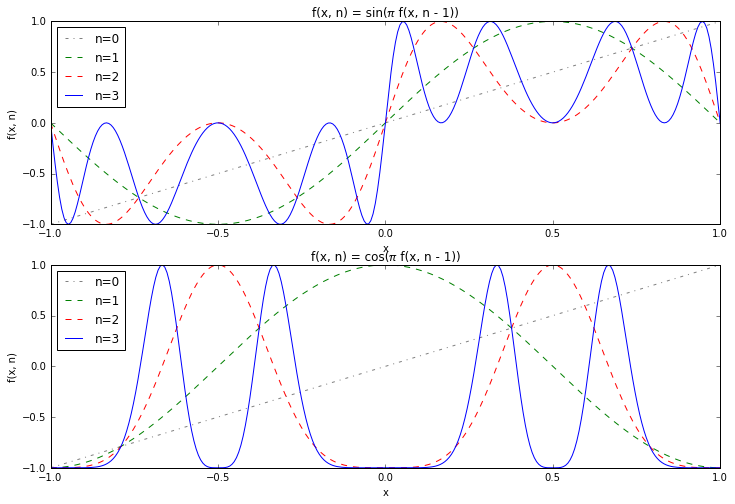

In [222]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 8), dpi=96, facecolor='white')
xs = np.linspace(-1, 1, 300)
properties = [('-.', 'gray'), ('--', 'green'), ('--', 'red'), ('-', 'blue')]
n = len(properties)

def set_ax(ax):
    ax.set_xlim(-1.0, 1.0)
    ax.set_ylim(-1.0, 1.0)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x, n)')
    ax.legend(loc='upper left')

# sin

ax1 = fig.add_subplot(2, 1, 1)

yss_sin = np.zeros((n, xs.size))
yss_sin[0] = xs
for i in range(1, n):
    yss_sin[i] = np.sin(np.pi * yss_sin[i - 1])

for i, ys_sin in enumerate(yss_sin):
    line, color = properties[i]
    ax1.plot(xs, ys_sin, line, color=color, label='n=' + str(i))

ax1.set_title('f(x, n) = sin(π f(x, n - 1))')
set_ax(ax1)

# cos

ax2 = fig.add_subplot(2, 1, 2)

yss_cos = np.zeros((n, xs.size))
yss_cos[0] = xs
for i in range(1, n):
    yss_cos[i] = np.cos(np.pi * yss_cos[i - 1])
    
for i, ys_cos in enumerate(yss_cos):
    line, color = properties[i]
    ax2.plot(xs, ys_cos, line, color=color, label='n=' + str(i))

ax2.set_title('f(x, n) = cos(π f(x, n - 1))')
set_ax(ax2)

plt.show()

## Jupyter 上での操作

In [76]:
from ipywidgets import interact, interactive, fixed
import ipywidgets

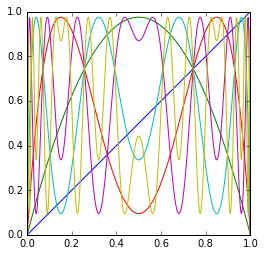

In [219]:
def logistic_map(x, a):
    return a * x * (1 - x)

@interact(a=(0.0, 4.0, 0.1), n=(1, 10, 1))
def chaos(a=3.5, n=5):
    plt.figure(figsize=(4, 4), dpi=96, facecolor='white')
    x = np.linspace(0, 1, 500)
    plt.plot(x, x)
    y = x
    for i in range(n):
        y = logistic_map(y, a)
        plt.plot(x, y)
    plt.xlim(0, 1)
    plt.ylim(0, 1)

## scatter

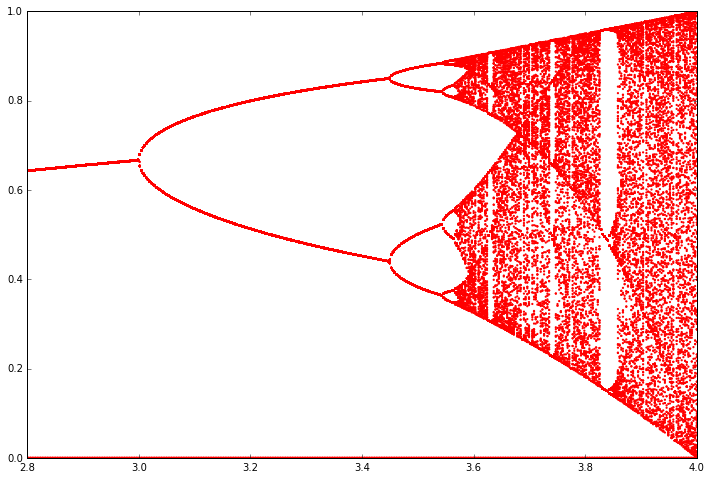

In [227]:
def logistic_map_rec(x, a, n):
    y = x
    for i in range(n):
        y = logistic_map(y, a)
    return y

fig = plt.figure(figsize=(12, 8), dpi=96, facecolor='white')
ax = fig.add_subplot(1, 1, 1)

as_ = np.linspace(2.8, 4, 400)
x = np.linspace(0, 1, 200)
for a in as_:
    y = logistic_map_rec(x, a, 2000)
    ax.scatter(np.full(x.size, a), y, c='red', marker='.', edgecolors='none')
ax.set_xlim(2.8, 4)
ax.set_ylim(0, 1)
plt.show()